In [1]:
from utiles import *
from IPython.display import display, HTML


## Textes explicatifs sur les indicateurs  : 


On calcule la matrice de contribution pour à chaque validation sur LD 
Les textes proposés par les enseignants ne sont pas pris en compte dans le calcule de l'indicateur 
On calcule la contribution de chaque étudiant en faisant la moyenne sur les mots ajoutés et modifiés 
On calcule la dispersion des contributions des étudiants autours du score équilibrée qui est égale à 1/nbr_etudiants
On 

In [2]:
df = pd.read_csv("data_final_kmeans.csv").drop(["Unnamed: 0"],axis =1)

# Création nouveau dataframe 
X = df.copy().drop(["id_labdoc", "labels"], axis=1)
# Création d'un vecteur des labels k-means
labels_kmeans = df["labels"]
# Changement des  noms des colonnes
names = ["n_users", "n_mots", "co_écriture", "balance_contribution",
         "durée_écriture", "plage_travail", "changement_contributeur"]
X.columns = names
# Convertire n_modifs en temps d'édition 
X["durée_écriture"] = X["durée_écriture"]*20

# Créer une colonne vide pour les nouveaux labels 
X["labels_ArbreDecision"] = np.nan

# Enléver les labdocs ayant un une plage de travail supérieur au temps d'écriture 
X = X[X.plage_travail > X.durée_écriture]

#X["Description_labels_ArbreDecision"] = np.nan

# Creation des cluster possible 
clusters = ["00", "01", "02", "10", "11", "12", "20", "21", "22"]
ClustersDescription = pd.DataFrame(
    [ j for _, j in enumerate(clusters)], columns=[ "description"],)
ClustersDescription["balance_contribution"] = [
    "faible", "faible", "faible", "moyenne", "moyenne", "moyenne", "forte", "forte", "forte"]
ClustersDescription["co_écriture"] = [
    "faible", "moyenne", "forte", "faible", "moyenne", "forte", "faible", "moyenne", "forte"]
X.head()

,n_users,n_mots,co_écriture,balance_contribution,durée_écriture,plage_travail,changement_contributeur,labels_ArbreDecision
0,3,67,0.086970,0.089902,260,1934637.0,3,NaN
1,2,180,0.616471,0.947732,1280,215938.0,1,NaN
2,3,110,0.035226,0.036662,1320,1818387.0,1,NaN
3,3,152,0.066678,0.069033,180,1933760.0,1,NaN
4,5,38,0.555177,0.555177,360,2278994.0,6,NaN


In [3]:
def ArbreDecision(df, NameBalContr, NameCoEcri, SeuilBalContr=(0, .33, .66, 1), SeuilCoEcri=(0, .33, .66, 1), clusters=["00", "01", "02", "10", "11", "12", "20", "21", "22"]):
    '''df : notre data frame 
     NameBalContr : le nom de la variable balance_contribution
     NameCoEcri : le nom de la variable co_écriture
     SeuilBalContr : les seuils décisions  de col1 ex : (0,.33,.66, .1)
     SeuilCoEcri : les seuils décisions  de col1
     Tags : 0 -> Faible, 1-> Moyen, 2 -> Fort
     clusters : 01 Faible balance_contribution et co_écriture moyenne '''
    for ligne in range(np.shape(df)[0]):
       BalContr, CoEcri = df[NameBalContr].iloc[ligne], df[NameCoEcri].iloc[ligne]

# balance_contribution faible
       if SeuilBalContr[0] <= BalContr <= SeuilBalContr[1]:
           if SeuilCoEcri[0] <= CoEcri <= SeuilCoEcri[1]:
               X["labels_ArbreDecision"].iloc[ligne]= 0

           elif SeuilCoEcri[1] < CoEcri <= SeuilCoEcri[2]:
               X["labels_ArbreDecision"].iloc[ligne] = 1

           elif SeuilCoEcri[2] < CoEcri <= SeuilCoEcri[3]:
               X["labels_ArbreDecision"].iloc[ligne] = 2


# balance_contribution moyenne
       elif SeuilBalContr[1] < BalContr <= SeuilBalContr[2]:
            if SeuilCoEcri[0] <= CoEcri <= SeuilCoEcri[1]:
                X["labels_ArbreDecision"].iloc[ligne]= 3

            elif SeuilCoEcri[1] < CoEcri <= SeuilCoEcri[2]:
                X["labels_ArbreDecision"].iloc[ligne]= 4

            elif SeuilCoEcri[2] < CoEcri <= SeuilCoEcri[3]:
                X["labels_ArbreDecision"].iloc[ligne]= 5


# balance_contribution forte
       elif SeuilBalContr[2] < BalContr <= SeuilBalContr[3]:
            if SeuilCoEcri[0] <= CoEcri <= SeuilCoEcri[1]:
                X["labels_ArbreDecision"].iloc[ligne]= 6


            elif SeuilCoEcri[1] < CoEcri <= SeuilCoEcri[2]:
                X["labels_ArbreDecision"].iloc[ligne]= 7


            elif SeuilCoEcri[2] < CoEcri <= SeuilCoEcri[3]:
                X["labels_ArbreDecision"].iloc[ligne]= 8

    X.labels_ArbreDecision = X.labels_ArbreDecision.astype(int)


In [4]:
ArbreDecision(X, "balance_contribution", "co_écriture",
              SeuilBalContr=(0, .33, .66, 1), SeuilCoEcri=(0, .33, .66, 1))


In [5]:
# fig, ax = plt.subplots()
# ax.scatter(X.co_écriture, X.balance_contribution,
#             c=X.labels_ArbreDecision)
# ax.set_xlabel("co_écriture")
# ax.set_ylabel("balance_contribution")
# plt.show()

In [6]:
gb = X.groupby("labels_ArbreDecision")
result = pd.DataFrame(gb.mean())
result["freq %"] = gb.size() / np.shape(X)[0] * 100
result.append(X.drop("labels_ArbreDecision", axis=1).mean(), ignore_index=True)
# # La dernière ligne est la moyenne sur tout le dataset
result


,n_users,n_mots,co_écriture,balance_contribution,durée_écriture,plage_travail,changement_contributeur,freq %
labels_ArbreDecision,,,,,,,,
0,2.194613,198.598015,0.099377,0.126416,780.081004,310452.598218,1.727825,30.376476
3,2.246927,247.593296,0.154773,0.483690,941.050279,337270.437244,1.990689,16.516978
4,2.306837,134.597611,0.464927,0.518366,630.247117,310024.487232,1.855848,14.936024
6,2.312176,244.121357,0.130918,0.852993,1053.876248,343766.491816,2.413573,15.409695
7,2.357062,183.570615,0.485689,0.827078,1011.526196,332767.380979,2.378132,10.802165
8,2.453189,94.024691,0.808093,0.852439,560.967078,292888.068416,2.186214,11.958661


In [7]:
# pour chaque n_user : nombre n_user dans le clusters / nombre total de n_user dans le cluster)

n_users_cluster = pd.DataFrame([ X[X["labels_ArbreDecision"] == i].groupby(
    "n_users").size() / X.groupby(
    "labels_ArbreDecision").size()[i] * 100 for i in X.labels_ArbreDecision.unique()], index=X.labels_ArbreDecision.unique())
n_users_cluster


n_users,2,3,4,5,6,7,8
0,82.908060,15.168084,1.579587,0.263264,0.060753,0.020251,NaN
7,69.248292,26.822323,3.189066,0.569476,0.056948,0.113895,NaN
4,74.011532,22.611203,2.429984,0.658979,0.205931,0.082372,NaN
3,80.260708,15.865922,2.942272,0.782123,0.148976,NaN,NaN
6,75.528942,20.279441,2.514970,1.077844,0.359281,0.199601,0.039920
8,67.746914,25.360082,3.446502,1.646091,1.080247,0.514403,0.205761


In [8]:
# pour chaque pass_main : nombre pass_main dans le cluster / nombre total de pass_main dans le cluster)
pass_main_cluster = pd.DataFrame([X[X["labels_ArbreDecision"] == i].groupby(
    "changement_contributeur").size() / X.groupby(
    "labels_ArbreDecision").size()[i] * 100 for i in X.labels_ArbreDecision.unique()], X.labels_ArbreDecision.unique())
pass_main_cluster


changement_contributeur,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25,27,29
0,58.282706,25.860672,8.687728,3.584447,1.802349,0.749291,0.405022,0.263264,0.162009,0.101256,0.020251,0.020251,NaN,NaN,NaN,0.040502,0.020251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,42.425968,24.601367,14.920273,7.630979,4.214123,2.220957,1.423690,0.569476,0.626424,0.455581,0.341686,0.170843,0.113895,0.113895,0.056948,0.056948,NaN,NaN,NaN,0.056948,NaN,NaN,NaN,NaN
4,55.930807,23.805601,10.420099,4.983526,1.976936,1.441516,0.700165,0.247117,0.205931,0.082372,0.082372,NaN,0.082372,NaN,NaN,NaN,NaN,NaN,0.041186,NaN,NaN,NaN,NaN,NaN
3,52.067039,25.065177,10.204842,6.405959,2.756052,1.527002,0.670391,0.558659,0.335196,0.186220,0.037244,NaN,0.037244,0.037244,NaN,0.037244,NaN,NaN,0.037244,NaN,NaN,0.037244,NaN,NaN
6,45.149701,23.433134,12.814371,6.746507,3.912176,3.193613,1.437126,0.918164,0.878244,0.479042,0.319361,0.119760,0.199601,0.079840,NaN,0.079840,0.079840,0.03992,NaN,NaN,0.03992,NaN,0.03992,0.03992
8,51.594650,23.868313,10.339506,5.606996,2.726337,1.440329,1.440329,0.617284,0.308642,0.565844,0.514403,0.154321,0.205761,0.154321,0.102881,0.154321,0.102881,NaN,0.051440,0.051440,NaN,NaN,NaN,NaN


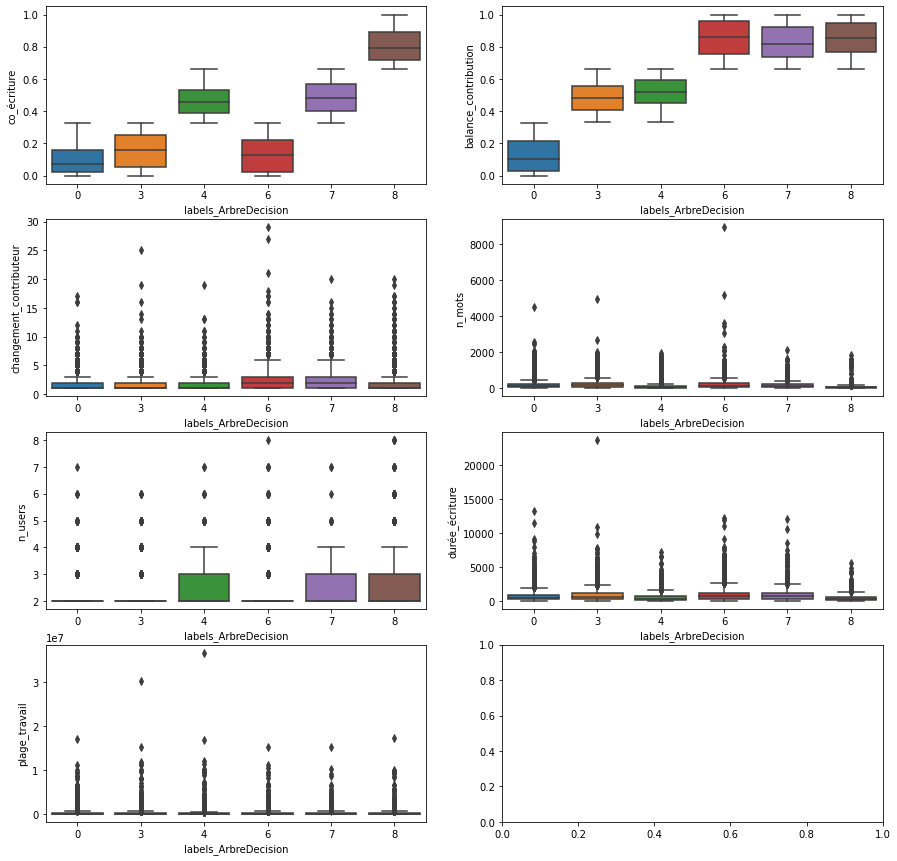

In [9]:
fig, ax = plt.subplots(4,2, figsize=(15,15))
sns.boxplot(x="labels_ArbreDecision", y="co_écriture", data=X,ax=ax[0,0])
sns.boxplot(x="labels_ArbreDecision",
            y="balance_contribution", data=X, ax=ax[0, 1])
sns.boxplot(x="labels_ArbreDecision",
            y="changement_contributeur", data=X, ax=ax[1, 0])
sns.boxplot(x="labels_ArbreDecision", y="n_mots", data=X,  ax=ax[1, 1])
sns.boxplot(x="labels_ArbreDecision", y="n_users", data=X,  ax=ax[2, 0])
sns.boxplot(x="labels_ArbreDecision", y="durée_écriture", data=X, ax=ax[2, 1])
sns.boxplot(x="labels_ArbreDecision", y="plage_travail", data=X,  ax=ax[3, 0])
plt.show()

# Enlever les valeurs  aberrantes pour chaque variables  

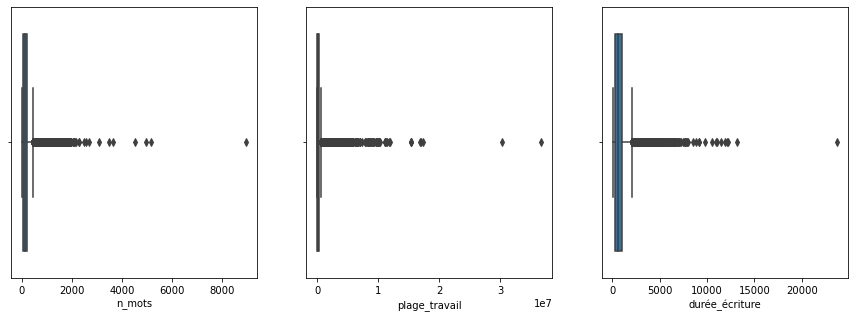

In [10]:
# Nous allons enlever des valeurs aberrantes des variables  "n_mots", "durée_écriture", "plage_travail".
# D'abords regardons la distribution des ces variables sur le dataset original X
columns_filtred = ["n_mots", "plage_travail","durée_écriture"]
fig,ax = plt.subplots(1,len(columns_filtred),figsize=(15,5))
for i, var in enumerate (columns_filtred):
    sns.boxplot(X[var],ax = ax[i])
plt.show()

In [11]:
# Nous allons essayer d'enlever certaines valeurs aberrantes de ces variables
X_filtred = X.copy()
# Enlever les labdocs ayant un nombre de mots <= à 15 mots 
X_filtred = X_filtred[X["n_mots"] > 15]

for x in columns_filtred:
    q75, q25, intr_qr, max , min  = 0,0,0,0,0
    q75, q25 = np.percentile(sorted(X_filtred.loc[:, x]), [
                             75, 25], interpolation='midpoint')
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    X_filtred.loc[X_filtred[x] <= min, x] = np.nan
    X_filtred.loc[X_filtred[x] >= max,x] = np.nan

# Enlever les labdocs ayant un nombre de mots inférieur à 15
# Le pourcentage de ces valeurs aberrantes du total 
X_filtred[columns_filtred].isna().sum() / np.shape(X)[0] * 100

n_mots             7.529528
plage_travail     11.700295
durée_écriture     6.619094
dtype: float64

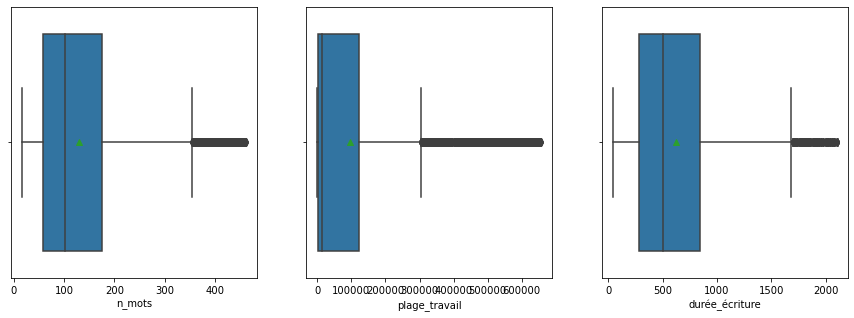

In [12]:
# Nous allons enlever ces valeurs aberrantes 
X_filtred.dropna(axis=0, inplace= True)
# Boites à moustaches des variables filtrées qui sont mieux dispersées 
fig, ax = plt.subplots(1, len(columns_filtred), figsize=(15, 5))
for i, var in enumerate(columns_filtred):
    sns.boxplot(X_filtred[var], ax=ax[i],showmeans=True)
plt.show()


In [13]:
ClustersDescription.T

,0,1,2,3,4,5,6,7,8
description,00,01,02,10,11,12,20,21,22
balance_contribution,faible,faible,faible,moyenne,moyenne,moyenne,forte,forte,forte
co_écriture,faible,moyenne,forte,faible,moyenne,forte,faible,moyenne,forte


![My Diagram](clusters.svg)


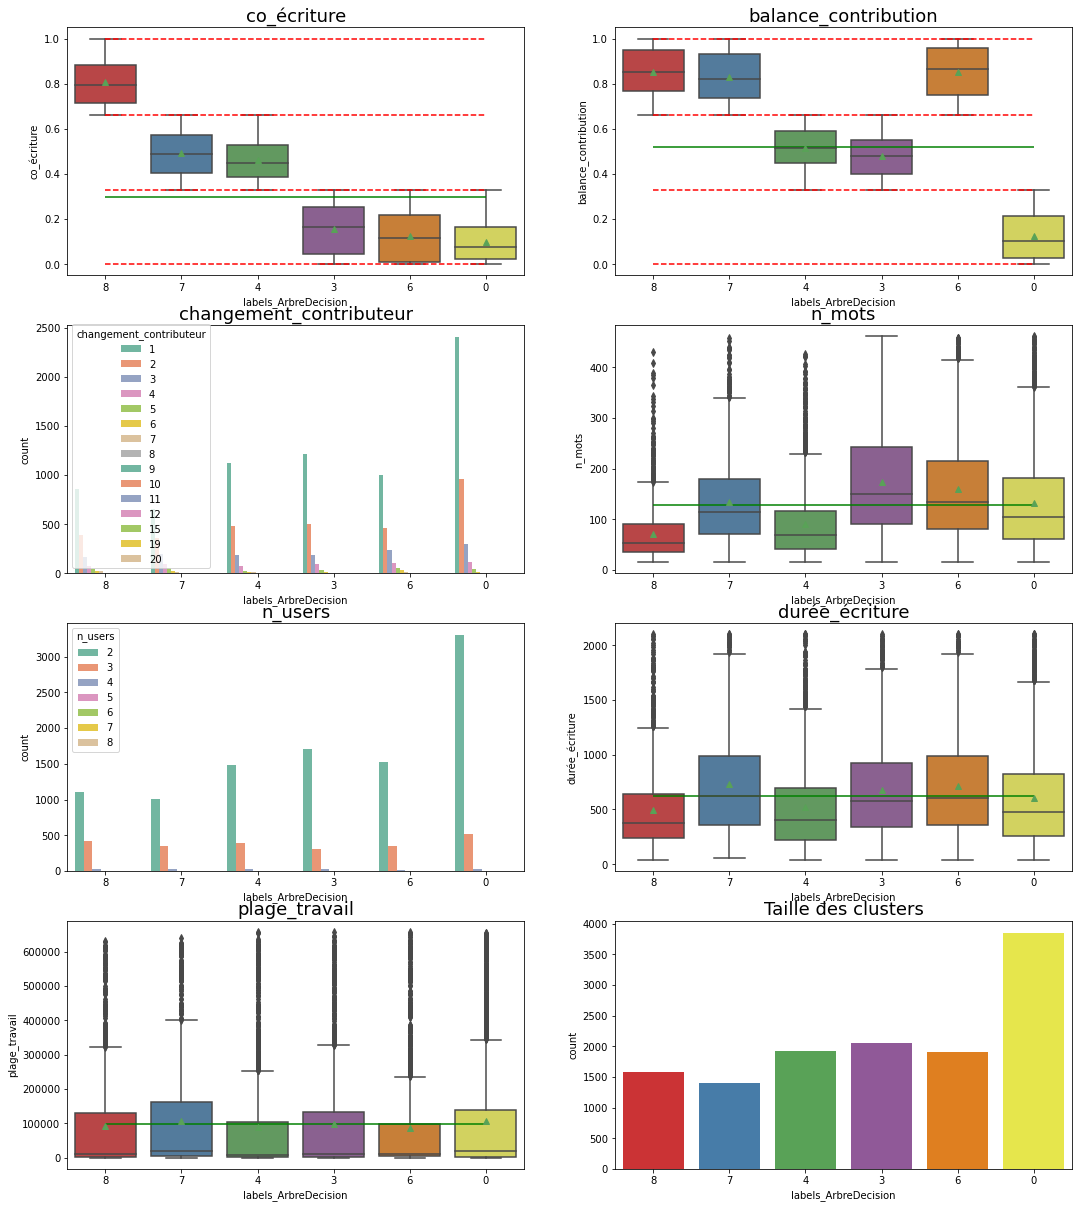

In [14]:
reference = [0, .33, .66, 1]
sns.set_palette("Set1", 8, .75)
order = X_filtred.groupby(
    "labels_ArbreDecision").median().sort_values("co_écriture", ascending=False).index

fig, ax = plt.subplots(4, 2, figsize=(18, 21))
sns.boxplot(x="labels_ArbreDecision", y="co_écriture",
            data=X_filtred, order=order, ax=ax[0, 0],showmeans=True).set_title("co_écriture").set_fontsize('18')
ax[0, 0].hlines(reference, xmin=0, xmax=5, color='r', linestyles='--')

ax[0, 0].hlines(np.mean(X_filtred.co_écriture), xmin=0, xmax=5, color='g', linestyles='-')


sns.boxplot(x="labels_ArbreDecision",
            y="balance_contribution", 
            data=X_filtred, order=order, ax=ax[0, 1], showmeans=True).set_title("balance_contribution").set_fontsize('18')
ax[0, 1].hlines(reference, xmin=0, xmax=5, color='r', linestyles='--')

ax[0, 1].hlines(np.mean(X_filtred.balance_contribution), xmin=0,
                xmax=5, color='g', linestyles='-')

# sns.boxplot(x="labels_ArbreDecision",y="changement_contributeur", 
#             data=X_filtred, order=order, ax=ax[1, 0], showmeans=True).set_title("changement_contributeur").set_fontsize('18')
sns.countplot(hue='changement_contributeur', x="labels_ArbreDecision",
              ax=ax[1, 0], order=order, palette="Set2", data=X_filtred).set_title("changement_contributeur").set_fontsize('18')

sns.boxplot(x="labels_ArbreDecision", y="n_mots",
            data=X_filtred, order=order,  ax=ax[1, 1], showmeans=True).set_title("n_mots").set_fontsize('18')

ax[1, 1].hlines(np.mean(X_filtred.n_mots), xmin=0,
                xmax=5, color='g', linestyles='-')

# sns.boxplot(x="labels_ArbreDecision", y="n_users",
#             data=X_filtred, order=order,  ax=ax[2, 0], showmeans=True).set_title("n_users").set_fontsize('18')
sns.countplot(hue='n_users', x="labels_ArbreDecision",
              ax=ax[2, 0], order=order, palette="Set2", data=X_filtred).set_title("n_users").set_fontsize('18')

sns.boxplot(x="labels_ArbreDecision", y="durée_écriture",
            data=X_filtred, order=order, ax=ax[2, 1], showmeans=True).set_title("durée_écriture").set_fontsize('18')

ax[2, 1].hlines(np.mean(X_filtred.durée_écriture), xmin=0,
                xmax=5, color='g', linestyles='-')

sns.boxplot(x="labels_ArbreDecision", y="plage_travail",
            data=X_filtred, order=order, ax=ax[3, 0], showmeans=True).set_title("plage_travail").set_fontsize('18')
ax[3, 0].hlines(np.mean(X_filtred.plage_travail), xmin=0,
                xmax=5, color='g', linestyles='-')

sns.countplot(x="labels_ArbreDecision", order=order ,palette="Set1",  ax=ax[3, 1], data=X_filtred).set_title("Taille des clusters").set_fontsize('18')
plt.show()


Commentaires :
* On ne retrouve pas les clusters 1,2 et 5. 
* C'est tout à fait normal de ne pas avoir les clusters 1 et 2 car, quand la balance de contribution est faible, la co-écriture est forcément faible. Idem pour le cluster 5, quand la balance de contribution est moyenne la co-écriture ne peut pas être forte.

## Taille des clusters

In [15]:
pd.DataFrame(X_filtred.groupby("labels_ArbreDecision").size() / np.shape(X_filtred)[0]*100, columns=["fréquence du total %"])

,fréquence du total %
labels_ArbreDecision,
0,30.308273
3,16.152878
4,15.075495
6,14.973262
7,11.001887
8,12.488204


## Co-écriture et balance de contribution 

In [16]:
# Description de la répartition des indicateurs 
X_filtred[["balance_contribution", "co_écriture",
           "labels_ArbreDecision"]].groupby("labels_ArbreDecision").describe()


balance_contribution                                                                       co_écriture                                                                      
                                    count      mean       std       min       25%       50%       75%       max       count      mean       std       min       25%       50%       75%       max
labels_ArbreDecision                                                                                                                                                                             
0                                  3854.0  0.125771  0.102755  0.000036  0.029193  0.101570  0.215510  0.329981      3854.0  0.100399  0.088142  0.000000  0.022619  0.076190  0.163752  0.329861
3                                  2054.0  0.481532  0.092452  0.330178  0.401614  0.481833  0.551516  0.659855      2054.0  0.154660  0.109306  0.000000  0.046198  0.165813  0.252498  0.329806
4                                  1917.0  0.516490  0.086764  0.330579  0.448361  0.515000  0.591981  0.659899      1917.0  0.462287  0.088992  0.330110  0.387348  0.448980  0.529912  0.659516
6                                  1904.0  0.854154  0.108598  0.660271  0.751306  0.863384  0.960000  1.000000      1904.0  0.124783  0.107764  0.000000  0.009527  0.115366  0.217825  0.329998
7                                  1399.0  0.828866  0.107437  0.660162  0.735273  0.819312  0.929633  1.000000      1399.0  0.491486  0.096125  0.330061  0.405219  0.488630  0.574861  0.659888
8                                  1588.0  0.853912  0.101280  0.660350  0.769634  0.853911  0.949905  1.000000      1588.0  0.806874  0.102286  0.660350  0.715968  0.792902  0.883573  1.000000

## Changement_contributeur 

In [17]:
# Description changement_contributeur
df_changement_contributeur = pd.DataFrame(X_filtred.groupby(
    ["labels_ArbreDecision", "changement_contributeur"]).size(), columns=["nombre"])
df_changement_contributeur["fréquence_cluster%"] = X_filtred.groupby(["labels_ArbreDecision", "changement_contributeur"]).size(
)/X_filtred.groupby("labels_ArbreDecision").size() * 100
df_changement_contributeur["fréquence_total%"] = X_filtred.groupby(["labels_ArbreDecision", "changement_contributeur"]).size(
)/np.shape(X_filtred)[0] * 100
df_changement_contributeur


nombre  fréquence_cluster%  fréquence_total%
labels_ArbreDecision changement_contributeur                                              
0                    1                          2404           62.376751         18.905316
                     2                           955           24.779450          7.510223
                     3                           303            7.861962          2.382825
                     4                           110            2.854177          0.865052
                     5                            46            1.193565          0.361749
                     6                            15            0.389206          0.117962
                     7                             8            0.207577          0.062913
                     8                             8            0.207577          0.062913
                     9                             4            0.103788          0.031456
                     10                            1            0.025947          0.007864
3                    1                          1209           58.860759          9.507707
                     2                           497           24.196689          3.908462
                     3                           187            9.104187          1.470588
                     4                            90            4.381694          0.707770
                     5                            38            1.850049          0.298836
                     6                            17            0.827653          0.133690
                     7                             5            0.243427          0.039321
                     8                             6            0.292113          0.047185
                     9                             3            0.146056          0.023592
                     10                            2            0.097371          0.015728
4                    1                          1120           58.424622          8.807801
                     2                           483           25.195618          3.798364
                     3                           183            9.546166          1.439132
                     4                            73            3.808033          0.574080
                     5                            28            1.460616          0.220195
                     6                            16            0.834637          0.125826
                     7                            10            0.521648          0.078641
                     8                             2            0.104330          0.015728
                     9                             1            0.052165          0.007864
                     19                            1            0.052165          0.007864
6                    1                          1002           52.626050          7.879836
                     2                           460           24.159664          3.617490
                     3                           232           12.184874          1.824473
                     4                           103            5.409664          0.810003
                     5                            49            2.573529          0.385341
                     6                            33            1.733193          0.259516
                     7                            14            0.735294          0.110098
                     8                             6            0.315126          0.047185
                     9                             3            0.157563          0.023592
                     10                            1            0.052521          0.007864
                     11                            1            0.052521          0.007864
7                    1                           651           46.533238          5.119534
                     2                    

## n_mots

In [18]:
# Description de n_mots
X_filtred[["n_mots", "labels_ArbreDecision"]
          ].groupby("labels_ArbreDecision").describe()

n_mots                                                          
                       count        mean         std   min   25%    50%     75%    max
labels_ArbreDecision                                                                  
0                     3854.0  131.666061   93.260869  16.0  61.0  105.0  181.00  461.0
3                     2054.0  173.426485  104.258303  16.0  91.0  149.5  243.00  461.0
4                     1917.0   91.601461   71.855709  16.0  41.0   70.0  117.00  427.0
6                     1904.0  159.097164   98.046401  17.0  81.0  135.0  215.00  458.0
7                     1399.0  134.303074   82.534293  16.0  72.0  115.0  179.50  458.0
8                     1588.0   71.481738   54.035266  16.0  35.0   54.0   90.25  430.0

## Plage de travail 

In [19]:
# description de la Page de travail 
describe_plage_travail = X_filtred[["plage_travail", "labels_ArbreDecision"]]
describe_plage_travail.plage_travail = pd.to_timedelta(
    X_filtred.plage_travail, unit='s')
describe_plage_travail.groupby("labels_ArbreDecision").describe()

plage_travail                                                                                                                                                  
                             count                      mean                       std             min                    25%             50%                    75%             max
labels_ArbreDecision                                                                                                                                                                
0                             3854 1 days 05:13:45.775817332 1 days 20:33:47.409640062 0 days 00:01:24        0 days 00:55:10 0 days 05:20:30 1 days 14:46:44.250000 7 days 13:33:12
3                             2054 1 days 02:59:21.851509250 1 days 18:54:57.132445924 0 days 00:03:04        0 days 00:49:26 0 days 02:48:51 1 days 12:47:30.250000 7 days 14:26:59
4                             1917 1 days 00:26:07.229003651 1 days 16:02:22.923661018 0 days 00:01:28        0 days 00:39:57 0 days 02:12:36        1 days 04:36:26 7 days 14:12:12
6                             1904 1 days 00:06:51.870798319 1 days 16:02:43.473939179 0 days 00:02:54 0 days 00:56:56.500000 0 days 03:11:13        1 days 02:53:13 7 days 14:12:12
7                             1399 1 days 05:37:29.531093638 1 days 19:43:55.608402352 0 days 00:01:43 0 days 01:05:17.500000 0 days 05:41:09 1 days 21:15:35.500000 7 days 09:44:38
8                             1588 1 days 01:51:51.316750629 1 days 15:39:54.215517184 0 days 00:01:24        0 days 00:42:07 0 days 02:53:35 1 days 12:14:44.250000 7 days 06:54:20

## Durée d'écriture

In [20]:
# description de la durée_écriture
describe_durée_écriture = X_filtred[["durée_écriture", "labels_ArbreDecision"]]
describe_durée_écriture.durée_écriture = pd.to_timedelta(
    describe_durée_écriture.durée_écriture, unit='s')
describe_durée_écriture.groupby("labels_ArbreDecision").describe()

durée_écriture                                                                                                                                    
                              count                      mean                       std             min             25%             50%             75%             max
labels_ArbreDecision                                                                                                                                                   
0                              3854 0 days 00:10:01.105345096 0 days 00:07:10.558064470 0 days 00:00:40 0 days 00:04:20 0 days 00:08:00 0 days 00:13:40 0 days 00:35:00
3                              2054 0 days 00:11:16.523855890 0 days 00:07:18.003029485 0 days 00:00:40 0 days 00:05:40 0 days 00:09:40 0 days 00:15:20 0 days 00:35:00
4                              1917 0 days 00:08:42.023995826 0 days 00:06:44.586019312 0 days 00:00:40 0 days 00:03:40 0 days 00:06:40 0 days 00:11:40 0 days 00:35:00
6                              1904 0 days 00:11:52.048319327 0 days 00:07:34.433413784 0 days 00:00:40 0 days 00:06:00 0 days 00:10:00 0 days 00:16:25 0 days 00:35:00
7                              1399 0 days 00:12:13.523945675 0 days 00:07:48.073187168 0 days 00:01:00 0 days 00:06:00 0 days 00:10:20 0 days 00:16:30 0 days 00:35:00
8                              1588 0 days 00:08:14.458438287 0 days 00:06:16.285726359 0 days 00:00:40 0 days 00:04:00 0 days 00:06:20 0 days 00:10:40 0 days 00:35:00

## n_users

In [21]:
# description n_users
df_n_user = pd.DataFrame(X_filtred.groupby(["labels_ArbreDecision","n_users"]).size(),columns=["nombre"])
df_n_user["fréquence_cluster%"] = X_filtred.groupby(["labels_ArbreDecision", "n_users"]).size(
)/X_filtred.groupby("labels_ArbreDecision").size() * 100
df_n_user["fréquence_total%"] = X_filtred.groupby(["labels_ArbreDecision", "n_users"]).size(
)/np.shape(X_filtred)[0]* 100
df_n_user


nombre  fréquence_cluster%  fréquence_total%
labels_ArbreDecision n_users                                              
0                    2          3305           85.755060         25.990878
                     3           513           13.310846          4.034288
                     4            30            0.778412          0.235923
                     5             5            0.129735          0.039321
                     6             1            0.025947          0.007864
3                    2          1712           83.349562         13.463353
                     3           313           15.238559          2.461466
                     4            27            1.314508          0.212331
                     5             2            0.097371          0.015728
4                    2          1483           77.360459         11.662472
                     3           394           20.552947          3.098459
                     4            34            1.773605          0.267380
                     5             4            0.208659          0.031456
                     6             1            0.052165          0.007864
                     7             1            0.052165          0.007864
6                    2          1532           80.462185         12.047814
                     3           348           18.277311          2.736710
                     4            21            1.102941          0.165146
                     5             1            0.052521          0.007864
                     6             1            0.052521          0.007864
                     7             1            0.052521          0.007864
7                    2          1006           71.908506          7.911293
                     3           354           25.303788          2.783894
                     4            33            2.358828          0.259516
                     5             4            0.285919          0.031456
                     7             2            0.142959          0.015728
8                    2          1111           69.962217          8.737024
                     3           423           26.637280          3.326518
                     4            35            2.204030          0.275244
                     5             8            0.503778          0.062913
                     6             2            0.125945          0.015728
                     7             6            0.377834          0.047185
                     8             3            0.188917          0.023592

## Tableau récapitulatif 

| Cluster                                                  	| 8 (22)                              	| 7 (21)                              	| 6 (20)                              	| 4 (11)                             	| 3 (10)                             	| 0 (00)                             	| Remarques                                                                                                                                                         	|
|----------------------------------------------------------	|-------------------------------------	|-------------------------------------	|-------------------------------------	|------------------------------------	|------------------------------------	|------------------------------------	|-------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| Balance de contribution<br>Moyenne                       	| 0.85                                	| 0.82                                	| 0.85                                	| 0.51                               	| 0.48                               	| 0.12                               	|  - faible dans 30.30 % des labdocs (cluster 0)<br> - moyenne dans 31.22 %  des labdocs (clusters 4 et 3)<br> - forte dans 38.45 % des labdocs (clusters 8, 7 et 6 	|
| Co-écriture<br>Moyenne                                   	| 0.80                                	| 0.49                                	| 0.12                                	| 0.46                               	| 0.15                               	| 0.10                               	|  - faible dans 60.42 % des labdocs (clusters 0,3 et 6)<br> - moyenne dans 26.07 %  des labdocs (clusters 4 et 7)<br> - forte dans 12.48 % des labdocs (cluster 8) 	|
| Changement de contributeur<br>(fréq. dans le cluster % ) 	| 1 (54.03)<br>2 (24.43)<br>3 (10.32) 	| 1 (46.53)<br>2 (25.66)<br>3 (14.29) 	| 1 (52.62)<br>2 (24.15)<br>3 (12.18) 	| 1 (58.42)<br>2 (25.19)<br>3 (9.54) 	| 1 (58.86)<br>2 (24.19)<br>3 (9.10) 	| 1 (62.3)<br>2 (24.77)<br>3 (7.861) 	| Distribuée de façon homogène<br>sur tous les clusters                                                                                                             	|
| nombre de mots <br>Moyenne<br>Médiane                    	| <br>71.48<br>54.0                   	| <br>134.30<br>115.0                 	| <br>159.09<br>135.0                 	| <br>91.60<br>70.0                  	| <br>173.42<br>149.5                	| <br>131<br>105                     	| À Balance de contribution fixée :<br>La co-écriture diminue quand le nombre de mots<br>augmente.                                                                  	|
| Plage de travail <br>Moyenne<br>Médiane                  	| <br>1 days 01:51:51.   <br>02:53:35 	| <br>1 days 05:37:29.   <br>05:41:09 	| <br>1 days 00:06:51.   <br>03:11:13 	| <br>1 days 00:26:07   <br>02:12:36 	| <br>1 days 02:59:21.  <br>02:48:51 	| <br>1 days 05:13:45.  <br>05:20:30 	| <br>Distribuée de façon homogène<br>sur tous les clusters                                                                                                         	|
| durée d'écriture<br>Moyenne<br>Médiane                   	| <br>00:08:14<br>00:06:20            	| <br>00:12:13<br>00:10:20            	| <br>00:11:52<br>00:10:00            	| <br>00:08:42<br>00:06:40           	| <br>00:11:16<br>00:09:40           	| <br>00:10:01<br>00:08:00           	| <br>Distribuée de façon homogène<br>sur tous les clusters                                                                                                         	|
| Nombre d'utilisateurs<br>(fréq. dans le cluster %)       	| 2 (69.96)<br>3 (26.63)              	| 2 (71.90)<br>3 (25.30)              	| 2 (80.46)<br>3 (18.27)              	| 2 (77.36)<br>3 (20.55)             	| 2 (83.34)<br>3 (15.23)             	| 2 (85.75)<br>3 (13.31)             	| Distribuée de façon homogène<br>sur tous les clusters                                                                                                             	|
| Taille du cluster<br>(fréq. du total %)                  	| 12.48                               	| 11.00                               	| 14.97                               	| 15.07                              	| 16.15                              	| 30.30                              	|                                                                                                                                                                   	|
| Remarques                                                	| séquentielle intégrative   (fort)                   	|        séquentielle intégrative  (faible)                            	|     séquentielle sommative (fort)                               	|              ?                      	|          séquentielle sommative (faible)                          	|               pas de collaboration                     	|                                                                                                                                                                   	|

## Commentaires : 
* Quand la balance de contribution est forte (dans les clusters 8 7 6), on remarque que la co-écriture diminue quand le nombre de mots augmente. On remarque le même phénomène dans les clusters 4 et 3. On pourrait se demander si, à balance de contribution fixe, il y a une corrélation négative entre le nombre de mots et l'indice de co-écriture. 
* Ces deux hypothèses sont confirmées par les deux matrices de corrélation ci-dessous.
* On remarque aussi une corrélation entre le nombre de mots et la durée c'écriture. Cette hypothèse est aussi confirmée ci-dessous.

<AxesSubplot:>

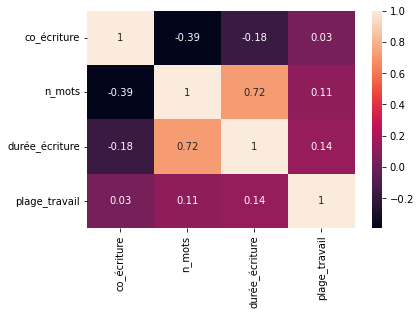

In [22]:
## Corrélation dans les clusters  8, 7 et 6 (forte balance de contribution)
df = X_filtred.query(
    'labels_ArbreDecision == 8 | labels_ArbreDecision == 7 | labels_ArbreDecision == 6')[["co_écriture", "n_mots", "durée_écriture", "plage_travail"]]
sns.heatmap(df.corr(), annot=True)

* Sans surprise, on remarque que la durée d'écriture augmentent en fonction de la taille des labdocs 


In [23]:
# test de corrélation de Spearman 
## H0 pas de corrélation. On l'accepte si pvalue >= alpha (0.01 ou 0.05)
### Il y'a en effet une corrélation significative
stats.spearmanr(df["n_mots"],df["co_écriture"])

SpearmanrResult(correlation=-0.43706965421384747, pvalue=2.2768163386572365e-227)

<AxesSubplot:>

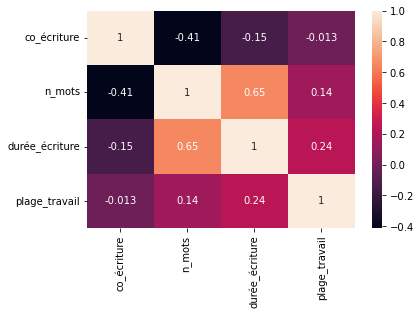

In [24]:
## Corrélation dans les clusters  4 et 3 (balance de contribution moyenne)
df1 = X_filtred.query(
    'labels_ArbreDecision == 4 | labels_ArbreDecision == 3')[["co_écriture", "n_mots", "durée_écriture", "plage_travail"]]
sns.heatmap(df1 .corr(), annot=True)


In [25]:
stats.spearmanr(df1
["co_écriture"],df1["n_mots"])

SpearmanrResult(correlation=-0.4574615373422724, pvalue=1.1957676207026415e-204)

<AxesSubplot:>

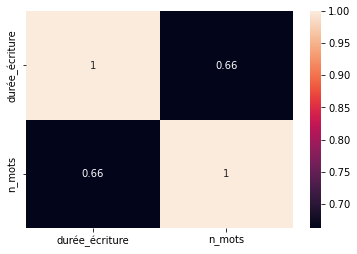

In [26]:
# Corrélation entre le nombre de mots et la durée d'écriture
sns.heatmap(X_filtred[["durée_écriture", "n_mots",
            ]].corr(), annot=True)


In [27]:
stats.spearmanr(X_filtred["co_écriture"],X_filtred["balance_contribution"])

SpearmanrResult(correlation=0.52052178346546, pvalue=0.0)

# Visualisation 

![My Diagram](vizu.svg)


# Labdocs avec une faible plage de travail (moins de 5 minutes)

In [28]:
X_filtred.describe()

,n_users,n_mots,co_écriture,balance_contribution,durée_écriture,plage_travail,changement_contributeur,labels_ArbreDecision
count,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000
mean,2.225307,129.253146,0.298624,0.519487,619.227745,97208.007864,1.780434,3.755190
std,0.491652,93.832753,0.264032,0.313877,437.278612,152397.599652,1.252256,2.922123
min,2.000000,16.000000,0.000000,0.000036,40.000000,84.000000,1.000000,0.000000
25%,2.000000,57.000000,0.068478,0.250933,280.000000,3088.750000,1.000000,0.000000
50%,2.000000,102.000000,0.233343,0.533395,500.000000,12454.000000,1.000000,4.000000
75%,2.000000,176.000000,0.471736,0.790220,840.000000,123442.750000,2.000000,6.000000
max,8.000000,461.000000,1.000000,1.000000,2100.000000,656819.000000,20.000000,8.000000


In [29]:
X_filtred_bis  = X_filtred[X_filtred["plage_travail"] < 300]
X_filtred_bis.describe()


,n_users,n_mots,co_écriture,balance_contribution,durée_écriture,plage_travail,changement_contributeur,labels_ArbreDecision
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,2.087379,48.067961,0.403503,0.518122,123.689320,211.203883,1.038835,3.786408
std,0.283770,35.392827,0.302758,0.284866,49.129487,61.310422,0.194146,3.114326
min,2.000000,17.000000,0.000000,0.012461,40.000000,84.000000,1.000000,0.000000
25%,2.000000,27.000000,0.145579,0.286348,80.000000,171.500000,1.000000,0.000000
50%,2.000000,33.000000,0.402148,0.499671,120.000000,225.000000,1.000000,4.000000
75%,2.000000,55.500000,0.630089,0.726536,160.000000,259.500000,1.000000,7.000000
max,3.000000,218.000000,0.998554,0.999184,240.000000,299.000000,2.000000,8.000000


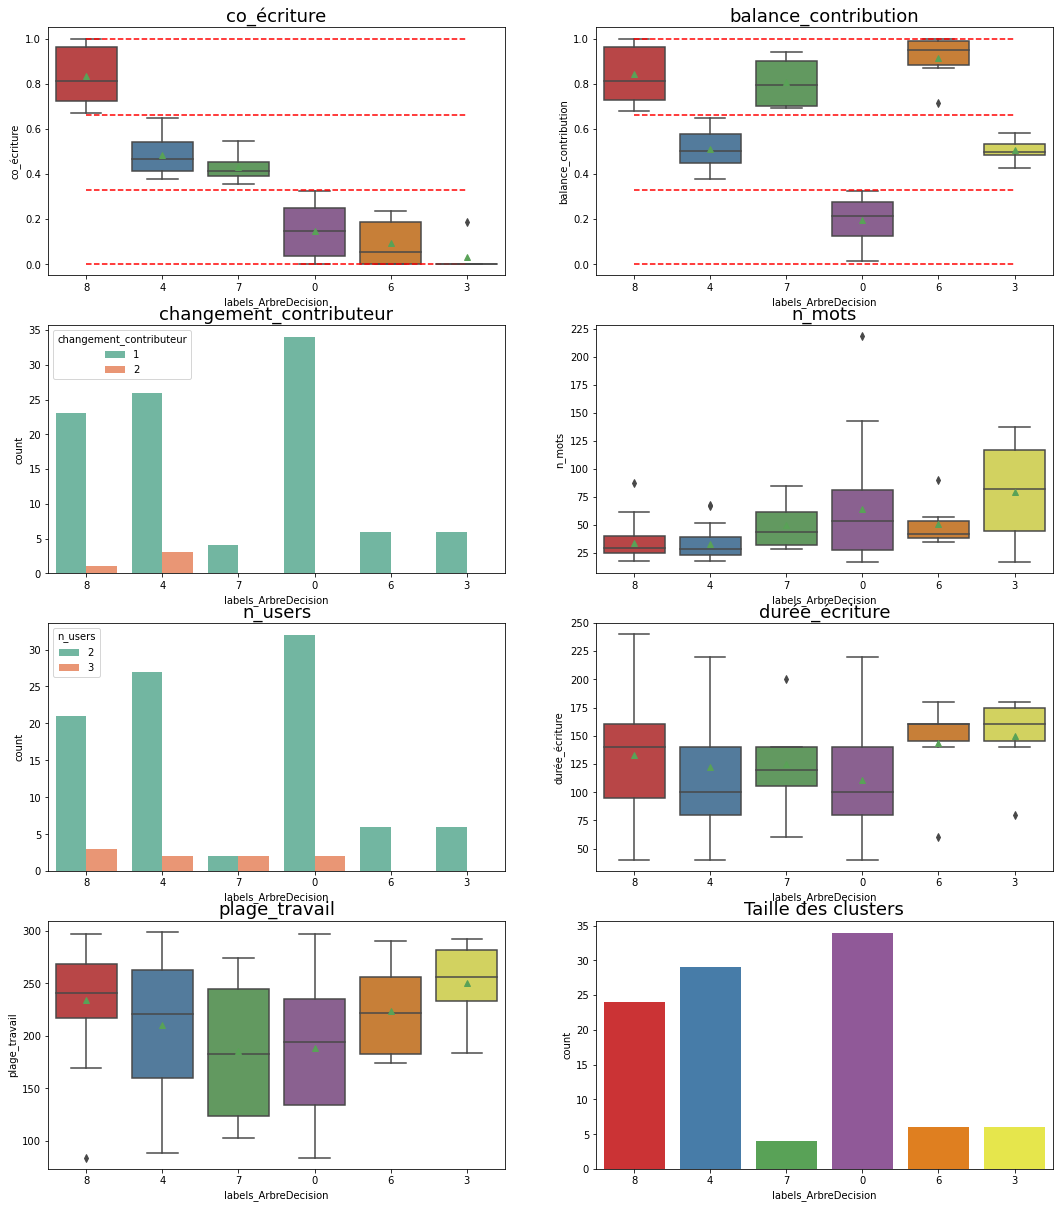

In [30]:
reference = [0, .33, .66, 1]
sns.set_palette("Set1", 8, .75)
order = X_filtred_bis.groupby(
    "labels_ArbreDecision").median().sort_values("co_écriture", ascending=False).index

fig, ax = plt.subplots(4, 2, figsize=(18, 21))
sns.boxplot(x="labels_ArbreDecision", y="co_écriture",
            data=X_filtred_bis, order=order, ax=ax[0, 0], showmeans=True).set_title("co_écriture").set_fontsize('18')
ax[0, 0].hlines(reference, xmin=0, xmax=5, color='r', linestyles='--')


sns.boxplot(x="labels_ArbreDecision",
            y="balance_contribution",
            data=X_filtred_bis, order=order, ax=ax[0, 1], showmeans=True).set_title("balance_contribution").set_fontsize('18')
ax[0, 1].hlines(reference, xmin=0, xmax=5, color='r', linestyles='--')


# sns.boxplot(x="labels_ArbreDecision",y="changement_contributeur",
#             data=X_filtred, order=order, ax=ax[1, 0], showmeans=True).set_title("changement_contributeur").set_fontsize('18')
sns.countplot(hue='changement_contributeur', x="labels_ArbreDecision",
              ax=ax[1, 0], order=order, palette="Set2", data=X_filtred_bis).set_title("changement_contributeur").set_fontsize('18')

sns.boxplot(x="labels_ArbreDecision", y="n_mots",
            data=X_filtred_bis, order=order,  ax=ax[1, 1], showmeans=True).set_title("n_mots").set_fontsize('18')

# sns.boxplot(x="labels_ArbreDecision", y="n_users",
#             data=X_filtred, order=order,  ax=ax[2, 0], showmeans=True).set_title("n_users").set_fontsize('18')
sns.countplot(hue='n_users', x="labels_ArbreDecision",
              ax=ax[2, 0], order=order, palette="Set2", data=X_filtred_bis).set_title("n_users").set_fontsize('18')

sns.boxplot(x="labels_ArbreDecision", y="durée_écriture",
            data=X_filtred_bis, order=order, ax=ax[2, 1], showmeans=True).set_title("durée_écriture").set_fontsize('18')
sns.boxplot(x="labels_ArbreDecision", y="plage_travail",
            data=X_filtred_bis, order=order, ax=ax[3, 0], showmeans=True).set_title("plage_travail").set_fontsize('18')

sns.countplot(x="labels_ArbreDecision", order=order, palette="Set1",
              ax=ax[3, 1], data=X_filtred_bis).set_title("Taille des clusters").set_fontsize('18')
plt.show()
